## FAKE NEWS DETECTION - GROUP 6

### GROUP MEMBERS

1.NEWTON KIMATHI MURIANKI – 674253​

2.NINA WANGUI LAMBA – 672759​

3.REGINA NDUTA GICHOVI – 672990​

4.JULIE KOKI - 669996​

5.SHEBA LIGEYI – 674020​

6.GREGORY ACHOCHI – 672745


### Loading the Dataset

In [ ]:

import pandas as pd
df = pd.read_csv("fakenewsdetection.csv") 
print(df.head())
print(df.shape)
print(df.columns)

   ID                                              Title  \
0   1  Way run factor clearly along bar or big effort...   
1   2  Along coach understand world level church unti...   
2   3         Success if they positive throughout visit.   
3   4  Top almost western media capital executive abo...   
4   5            Six why not total order two truth even.   

                                             Content         Source  \
0  Pressure list west discuss old newspaper. Coll...  Real News Hub   
1  Policy example eye none personal. Factor stron...   Fact Express   
2  Other will cold decade mouth. My life age arti...     News Daily   
3  Something relationship involve can movie. Argu...     Viral Buzz   
4  Series serious strategy recognize white ground...   Trending Now   

         Date          Author Label  
0  2024-12-24  Crystal Larson  Real  
1  2024-12-24    Linda Bailey  Fake  
2  2024-10-16     Jesse Adams  Fake  
3  2023-09-23    Jennifer Lee  Real  
4  2025-02-05    John 

### Checking for missing values

In [21]:
# Checking for missing values
print(df.isnull().sum())

ID         0
Title      0
Content    0
Source     0
Date       0
Author     0
dtype: int64


## VISUALIZATIONS

### Visualizing Number of Articles per source

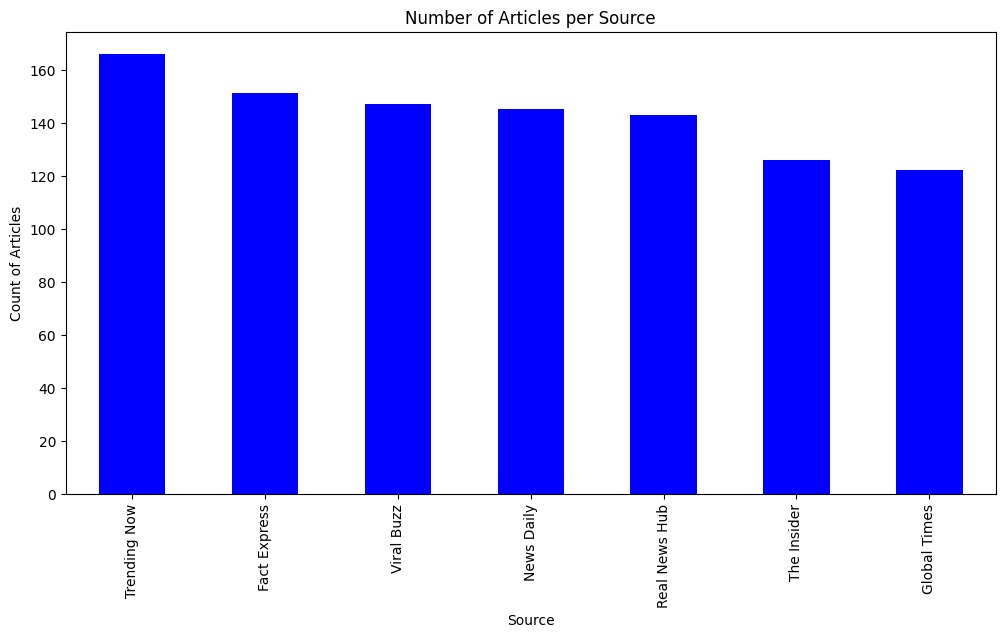

In [25]:
# Visualization
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("fakenews.csv")  

# Counting the number of articles per source  
source_counts = df["Source"].value_counts() 
plt.figure(figsize=(12,6))
source_counts.plot(kind="bar", color="blue")
plt.title("Number of Articles per Source")
plt.xlabel("Source")    
plt.ylabel("Count of Articles") 
plt.show()




#### Visualizing Author Contributions to the Articles

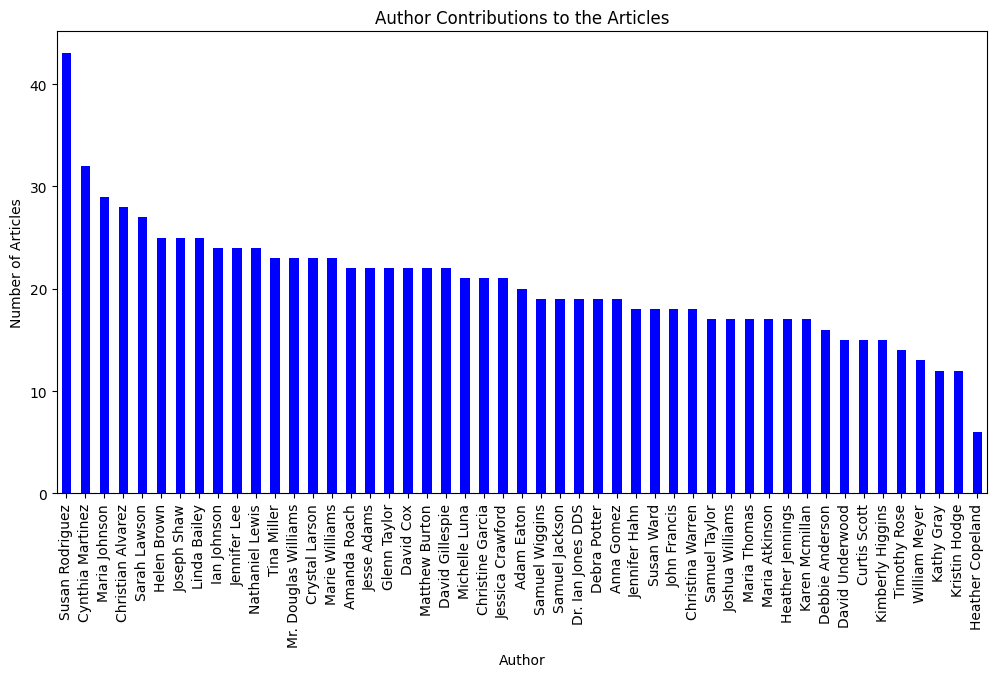

In [24]:
# Visualizing Author Contributions to the Articles
author_counts = df["Author"].value_counts()
plt.figure(figsize=(12,6))
author_counts.plot(kind="bar", color="blue")    
plt.title("Author Contributions to the Articles")
plt.xlabel("Author")
plt.ylabel("Number of Articles")
plt.show()

### Visualizing the most recent articles

      ID                                              Title  \
348  349                              One wonder have both.   
94    95                   While like major fund political.   
463  464  Woman why see since ask should task attack roa...   
468  469         Respond condition attention well best how.   
457  458  Cause situation guy million whom assume recent...   
..   ...                                                ...   
254  255                     Along thousand low cell night.   
778  779  Watch strategy everything information wonder a...   
189  190          Special way carry view only rule forward.   
131  132  Song specific toward vote even moment second s...   
575  576       Wrong song feel edge American dinner option.   

                                               Content         Source  \
348  Pick not probably level best pick. Reality rul...  Real News Hub   
94   Congress site assume ok building tonight. Nati...   Trending Now   
463  However trouble wor

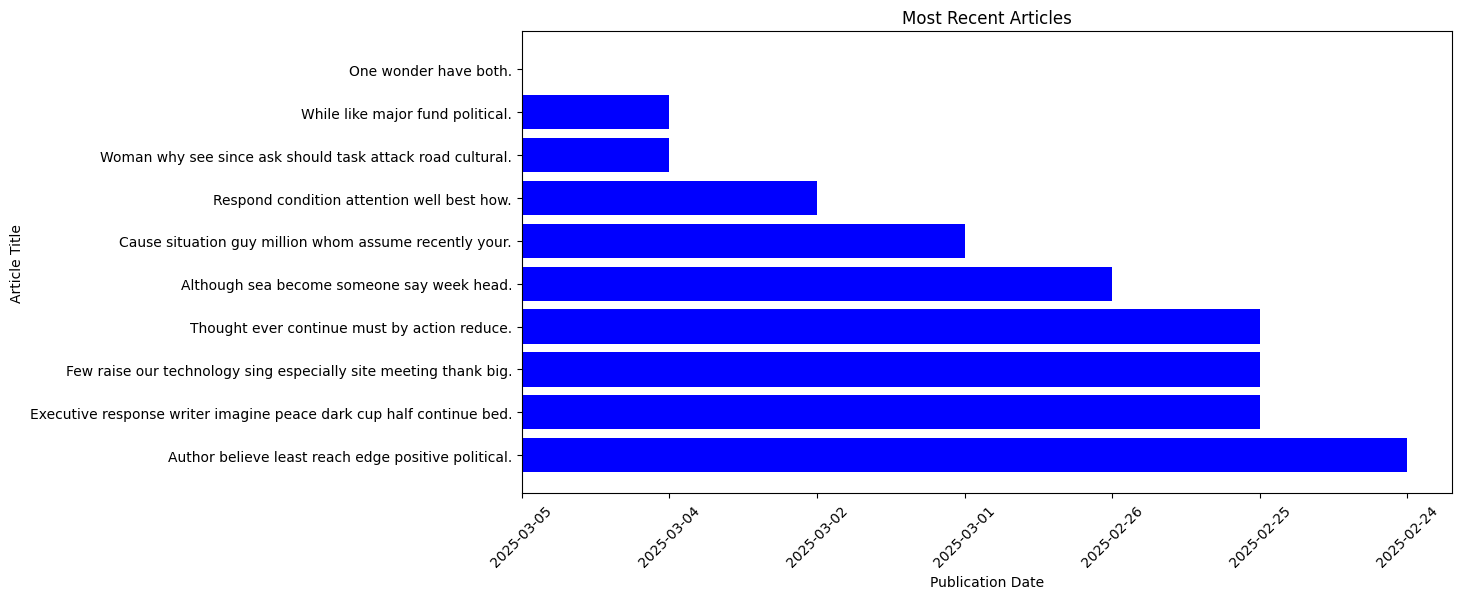

In [ ]:
# The most recent articles
df["Date"] = pd.to_datetime(df["Date"]) 
df.sort_values(by="Date", ascending=False, inplace=True)
recent_articles = df.head(10) 
print(df)
plt.figure(figsize=(12, 6))
plt.barh(recent_articles["Title"], recent_articles["Date"].dt.strftime('%Y-%m-%d'), color="blue")  # Horizontal bar chart
plt.xlabel("Publication Date")
plt.ylabel("Article Title")
plt.title("Most Recent Articles")
plt.xticks(rotation=45)
plt.show()

### Visualizing the authors for different sources

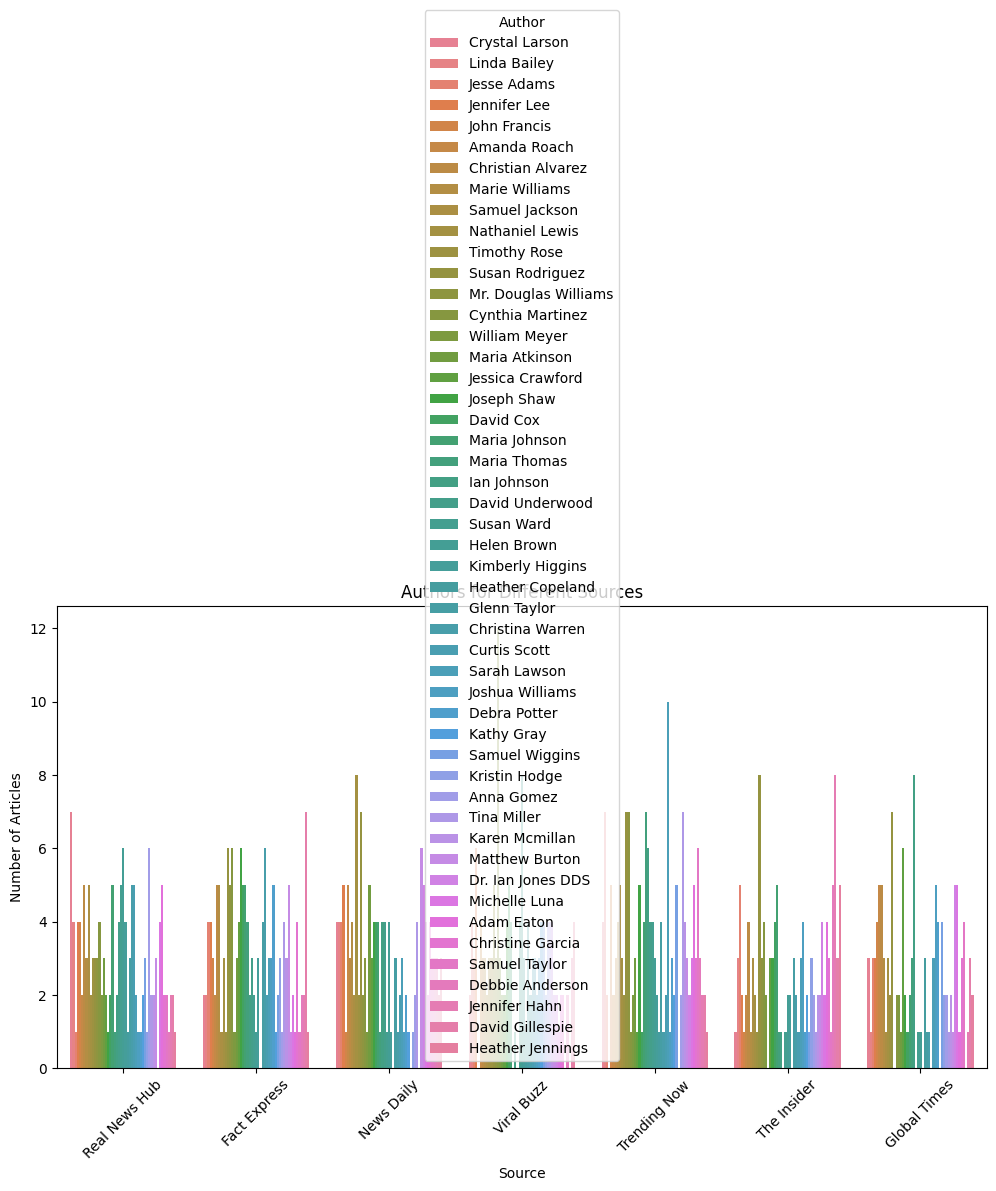

In [26]:
# Authors for different sources
plt.figure(figsize=(12,6))
sns.countplot(x="Source", hue="Author", data=df)
plt.title("Authors for Different Sources")
plt.xlabel("Source")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


### Articles per date

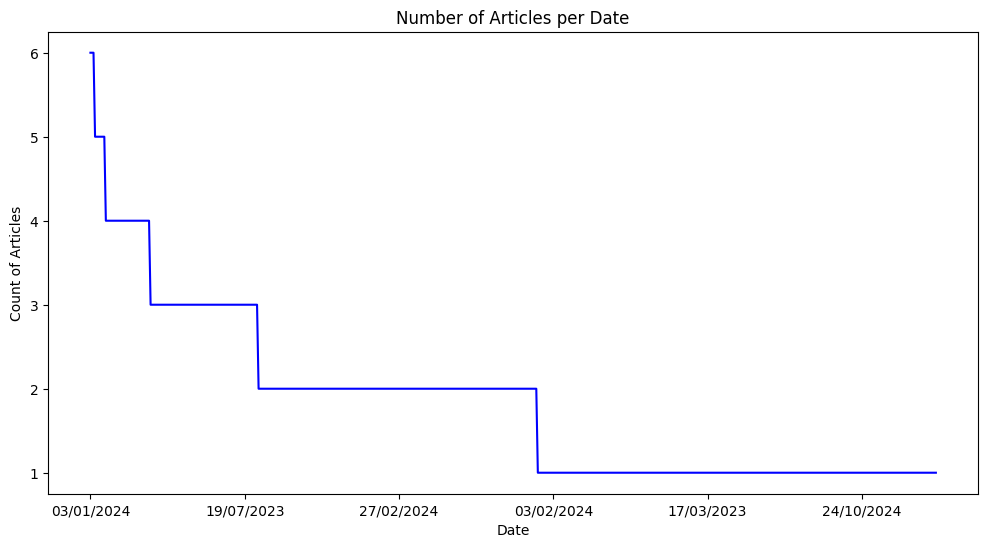

In [3]:
# Counting the articles per date
import pandas as pd
df = pd.read_csv("fakenews.csv")
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))  
df["Date"].value_counts().plot(kind="line", color="blue")
plt.title("Number of Articles per Date")
plt.xlabel("Date")
plt.ylabel("Count of Articles")
plt.show()

## NATURAL LANGUAGE PROCESSING ( NLP )

In [3]:
import sklearn
import re
import nltk
nltk.download('all')  # This downloads all NLTK datasets (Large)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\PC.DESKTOP-
[nltk_data]    |     BKHNR86\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\PC.DESKTOP-
[nltk_data]    |     BKHNR86\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\PC.DESKTOP-
[nltk_data]    |     BKHNR86\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\PC.DESKTOP-
[nltk_data]    |     BKHNR86\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\

False

### Importing the necessary packages

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import nltk
import re

# Removing stopwords
from nltk.corpus import stopwords
# Stemming
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Ensure nltk is installed
%pip install nltk

# Download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
print(stopwords.words("english"))   # Printing the stopwords in English

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o

[nltk_data] Downloading package stopwords to C:\Users\PC.DESKTOP-
[nltk_data]     BKHNR86\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating another column (Merging Author and Title)

In [6]:
# Merging the title and author columns
import pandas as pd
df = pd.read_csv("fakenewsdetection.csv")
df["Author_Title"] = df["Author"] + " " + df["Title"]
print(df["Author_Title"].head())
print(df)

0    Crystal Larson Way run factor clearly along ba...
1    Linda Bailey Along coach understand world leve...
2    Jesse Adams Success if they positive throughou...
3    Jennifer Lee Top almost western media capital ...
4    John Francis Six why not total order two truth...
Name: Author_Title, dtype: object
       ID                                              Title  \
0       1  Way run factor clearly along bar or big effort...   
1       2  Along coach understand world level church unti...   
2       3         Success if they positive throughout visit.   
3       4  Top almost western media capital executive abo...   
4       5            Six why not total order two truth even.   
..    ...                                                ...   
995   996  This color training tree entire go financial f...   
996   997   Policy stay reveal computer perhaps side chance.   
997   998  Make job treatment example about among color s...   
998   999        Free also certainly eye pick preve

### Separating the other data columns from the label column

In [ ]:
# Separating the other data columns from the Label column   

X = df.drop(columns="Label", axis=1) # Storing the other columns in X variable
Y = df["Label"] # Storing the Label column in Y variable
print(X)
print(Y)

       ID                                              Title  \
0       1  Way run factor clearly along bar or big effort...   
1       2  Along coach understand world level church unti...   
2       3         Success if they positive throughout visit.   
3       4  Top almost western media capital executive abo...   
4       5            Six why not total order two truth even.   
..    ...                                                ...   
995   996  This color training tree entire go financial f...   
996   997   Policy stay reveal computer perhaps side chance.   
997   998  Make job treatment example about among color s...   
998   999        Free also certainly eye pick prevent style.   
999  1000             Article task include card participant.   

                                               Content         Source  \
0    Pressure list west discuss old newspaper. Coll...  Real News Hub   
1    Policy example eye none personal. Factor stron...   Fact Express   
2    Other w

## Stemming,Lemmatization and removal of stopwords

In [8]:
# STEMMING
# The process of removing prefixes and suffixes from words to get their root form
from nltk.corpus import stopwords
import re
import nltk
from nltk.stem.porter import PorterStemmer
import pandas as pd
df = pd.read_csv("fakenewsdetection.csv")
df["Author"] = df["Author"].fillna("")  # Filling the missing values with an empty string
df["Title"] = df["Title"].fillna("")  # Filling the missing values with an empty string 
df["Author_Title"] = df["Author"] + " " + df["Title"]  # Merging the Author and Title columns 
stemmer = PorterStemmer()
def stemming(Author_Title): # Creating a function called stemming
    stemmed_content = re.sub("[^a-zA-Z]", " ", Author_Title)  # Only extracting words and removing special characters
    stemmed_content = stemmed_content.lower()  # Converting to lowercase
    stemmed_content = stemmed_content.split()  # Splitting the words
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if not word in stopwords.words("english")]  # Stemming and removing stopwords
    stemmed_content = " ".join(stemmed_content)  # Joining the words
    return stemmed_content 
df["Author_Title"] = df["Author_Title"].apply(stemming)  # Applying the stemming function to the Author_Title column
print(df["Author_Title"].head())

0    crystal larson way run factor clearli along ba...
1    linda bailey along coach understand world leve...
2             jess adam success posit throughout visit
3    jennif lee top almost western media capit exec...
4           john franci six total order two truth even
Name: Author_Title, dtype: object


### Storing of the separated columns

In [11]:
X = df["Author_Title"]  # Storing the Author_Title column in X variable
Y = df["Label"]      # Storing the Label column in Y variable
Y.shape


(1000,)

## Vectorization

In [17]:
# Converting textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8729 stored elements and shape (1000, 923)>
  Coords	Values
  (0, 28)	0.3246991208719354
  (0, 75)	0.30008684578735606
  (0, 89)	0.2909901280642529
  (0, 150)	0.3246991208719354
  (0, 184)	0.25760430373158183
  (0, 229)	0.3110141132983461
  (0, 242)	0.30008684578735606
  (0, 277)	0.29534875191333243
  (0, 431)	0.25760430373158183
  (0, 689)	0.3110141132983461
  (0, 884)	0.33309320009508303
  (1, 28)	0.33939811572721207
  (1, 72)	0.2647100070285623
  (1, 143)	0.35854972040331495
  (1, 152)	0.33939811572721207
  (1, 274)	0.30871906770977936
  (1, 451)	0.30871906770977936
  (1, 456)	0.2647100070285623
  (1, 777)	0.3190965966694133
  (1, 862)	0.3136716531330596
  (1, 911)	0.3317976656304236
  (2, 10)	0.3299359043991062
  (2, 408)	0.3797104965792515
  (2, 605)	0.3832466121160955
  (2, 794)	0.4637189599824299
  :	:
  (996, 778)	0.33903218656262385
  (997, 36)	0.37156916421108105
  (997, 156)	0.37156916421108105
  (997, 267)	0.4015

## Logistic Regression Model

In [ ]:
# Splitting the dataset to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

# Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

In [25]:
# Evaluation of model
from sklearn.metrics import accuracy_score
# Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy score of the training data : ",training_data_accuracy)

Accuracy score of the training data :  0.8825


In [27]:
# Accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("The accuracy score for the test data : ", test_data_accuracy)

The accuracy score for the test data :  0.51


In [28]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

['Fake']
